# Ejercicio de programación Regresión Lineal
En esta regresión lineal estamos utilizando el dataset "Gold Price Regression", cuyo propósito es estimar el valor del oro a partir de variables relacionadas con el índice bursátil S&P 500.

Para ello, hemos seleccionado específicamente las columnas:

S&P500 Open: el valor de apertura del índice S&P 500 en una sesión de mercado.

S&P500 Close: el valor de cierre del mismo índice en esa sesión.

La lógica detrás de esta elección es que el precio del oro está fuertemente influenciado por el desempeño de los mercados financieros. El S&P 500, al ser uno de los índices más representativos de la economía de Estados Unidos, refleja el comportamiento agregado de las principales empresas estadounidenses.

In [ ]:
# utilizado para manejos de directorios y rutas / maneja las carpetas
import os

# Computacion vectorial y cientifica para python /ayuda a calcular arrays matrices as (alias)
import numpy as np
import pandas as pd
# Librerias para graficación (trazado de gráficos) graficos 2d
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Leer datos separados por una coma
# data = np.loadtxt('ex1data1.txt', delimiter=',')
# data = np.loadtxt(os.path.join('data', 'ex1data1.txt'), delimiter=',')
datas = pd.read_csv('/content/drive/MyDrive/IA/financial_regression.csv')
data = datas[['sp500 open', 'sp500 close']].dropna()
X = data['sp500 open'].values   # primera columna
y = data['sp500 close'].values   # segunda columna
m = y.size


In [ ]:
print(X)

[114.49 114.73 113.62 ... 583.85 581.05 581.26]


In [ ]:
print(y)

[114.93 113.64 115.06 ... 583.63 583.32 577.99]


In [ ]:
print(X.size)

3719


In [ ]:
datas.head()

,date,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,...,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume
0,2010-01-14,114.49,115.14,114.42,114.93,115646960.0,0.72,46.26,46.520,46.22,...,45.02,43.86,44.84,364528.0,1.16,111.51,112.37,110.79,112.03,18305238.0
1,2010-01-15,114.73,114.84,113.20,113.64,212252769.0,1.64,46.46,46.550,45.65,...,45.76,44.40,45.76,442210.0,1.36,111.35,112.01,110.38,110.86,18000724.0
2,2010-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-19,113.62,115.13,113.59,115.06,138671890.0,1.54,45.96,46.640,45.95,...,47.08,45.70,46.94,629150.0,1.38,110.95,111.75,110.83,111.52,10467927.0
4,2010-01-20,114.28,114.45,112.98,113.89,216330645.0,1.47,46.27,46.604,45.43,...,47.31,45.17,47.05,643198.0,2.14,109.97,110.05,108.46,108.94,17534231.0


In [ ]:
def plotData(x, y):
    """
    Grafica los puntos de S&P500: apertura (x) vs cierre (y)
    """

    fig = pyplot.figure()  # abre una nueva figura

    # 'ro' = puntos rojos, ms = tamaño, mec = borde negro
    pyplot.plot(x, y, 'ro', ms=5, mec='k')

    pyplot.ylabel('S&P500 Close')
    pyplot.xlabel('S&P500 Open')
    pyplot.title('Relación entre apertura y cierre del S&P500')

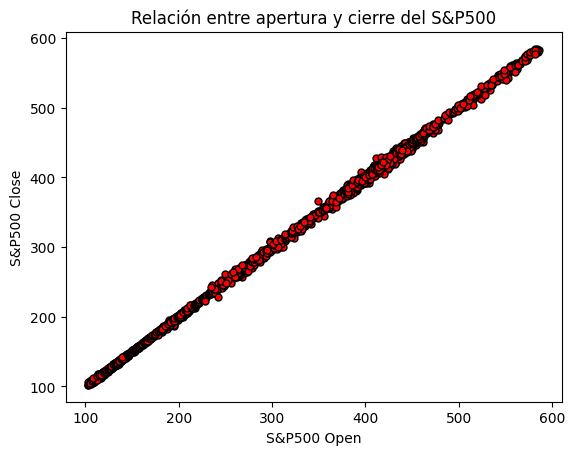

In [ ]:
plotData(X, y)

In [ ]:

X = np.stack([np.ones(m), X], axis=1)

In [ ]:
print(X)

[[  1.   114.49]
 [  1.   114.73]
 [  1.   113.62]
 ...
 [  1.   583.85]
 [  1.   581.05]
 [  1.   581.26]]


In [ ]:
def calcularCosto(X, y, theta):
    # inicializa algunos valores importantes
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    # h = np.dot(X, theta)
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

In [ ]:
def gradientDescent(X, y, theta, alpha, num_iters):
        # Inicializa algunos valores importantes
    m = y.shape[0]  # numero de ejemplos de entrenamiento

    # hace una copia de theta, para evitar cambiar la matriz original,
    # ya que las matrices numpy se pasan por referencia a las funciones

    theta = theta.copy()

    J_history = [] # Lista que se utiliza para almacenar el costo en cada iteración

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        # save the cost J in every iteration
        J_history.append(calcularCosto(X, y, theta))

    return theta, J_history

In [ ]:
# inicializa los parametros de ajuste
theta = np.zeros(2)

# configuraciones para el descenso por el gradiente
iterations = 10

alpha = 0.00001

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print('Theta encontrada por descenso gradiente: {:.4f}, {:.4f}'.format(*theta))
print('Valores theta esperados (aproximadamente): [-3.6303, 1.1664]')
print(J_history)

Theta encontrada por descenso gradiente: 0.0031, 1.0001
Valores theta esperados (aproximadamente): [-3.6303, 1.1664]
[np.float64(743.8049444157417), np.float64(15.425632066610358), np.float64(3.013564313952342), np.float64(2.802054426382229), np.float64(2.798450156482183), np.float64(2.7983887365351308), np.float64(2.7983876891067743), np.float64(2.798387670466279), np.float64(2.7983876693570156), np.float64(2.7983876685465)]


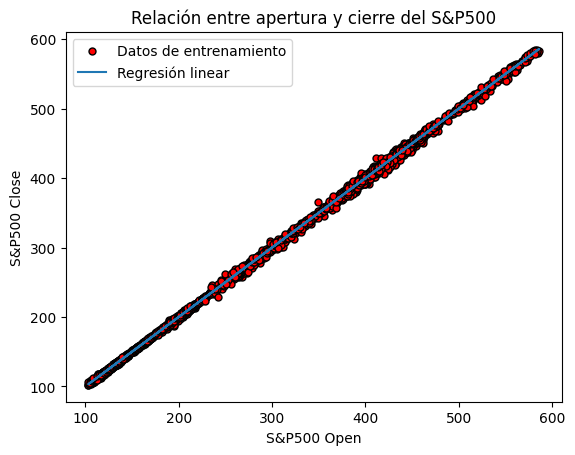

In [ ]:
# grafica la linea de ajuste
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')
pyplot.legend(['Datos de entrenamiento', 'Regresión linear']);

In [ ]:
# Supongamos que ya tienes theta = [theta0, theta1] de tu regresión lineal
# theta0 = intercepto, theta1 = pendiente

# Predicciones del cierre para aperturas específicas
predict1 = np.dot([1, 114.5], theta)
print('Para S&P500 Open = 114.5, se predice Close = {:.2f}\n'.format(predict1))

predict2 = np.dot([1, 115.0], theta)
print('Para S&P500 Open = 115.0, se predice Close = {:.2f}\n'.format(predict2))


Para S&P500 Open = 114.5, se predice Close = 114.52

Para S&P500 Open = 115.0, se predice Close = 115.02



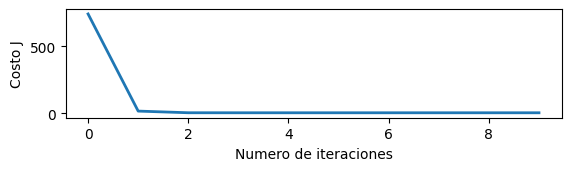

In [ ]:
# cuadrícula sobre la que se calcula J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# inicializa J_vals con una matriz de 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Completar J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = calcularCosto(X, y, [theta0, theta1])

# Debido a la forma en que funcionan las cuadrículas en el comando surf,
# se necesita transponer J_vals antes de llamar a surf, o de lo contrario los ejes se invertirán
J_vals = J_vals.T



# Grafica la convergencia del costo
ax = pyplot.subplot(313)
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

pass